<a href="https://colab.research.google.com/github/surbhi2003nke/R_Programming/blob/main/R_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

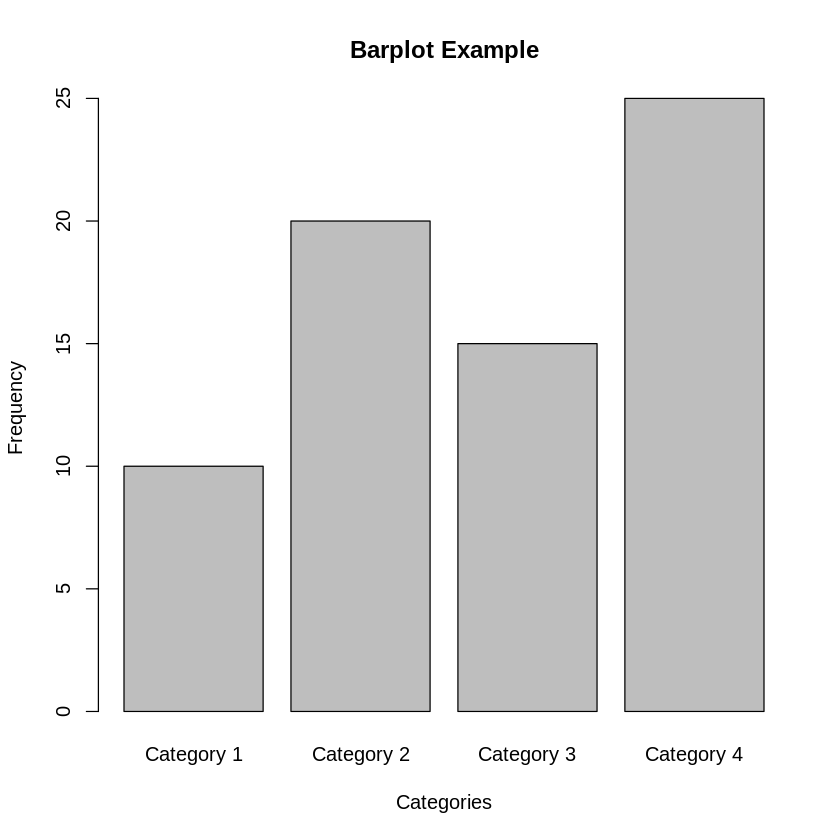

In [1]:
# Sample data
height <- c(10, 20, 15, 25)  # Frequency of each category
categories <- c("Category 1", "Category 2", "Category 3", "Category 4")  # Names of categories

# Creating a barplot
barplot(height, names.arg = categories, xlab = "Categories", ylab = "Frequency", main = "Barplot Example")


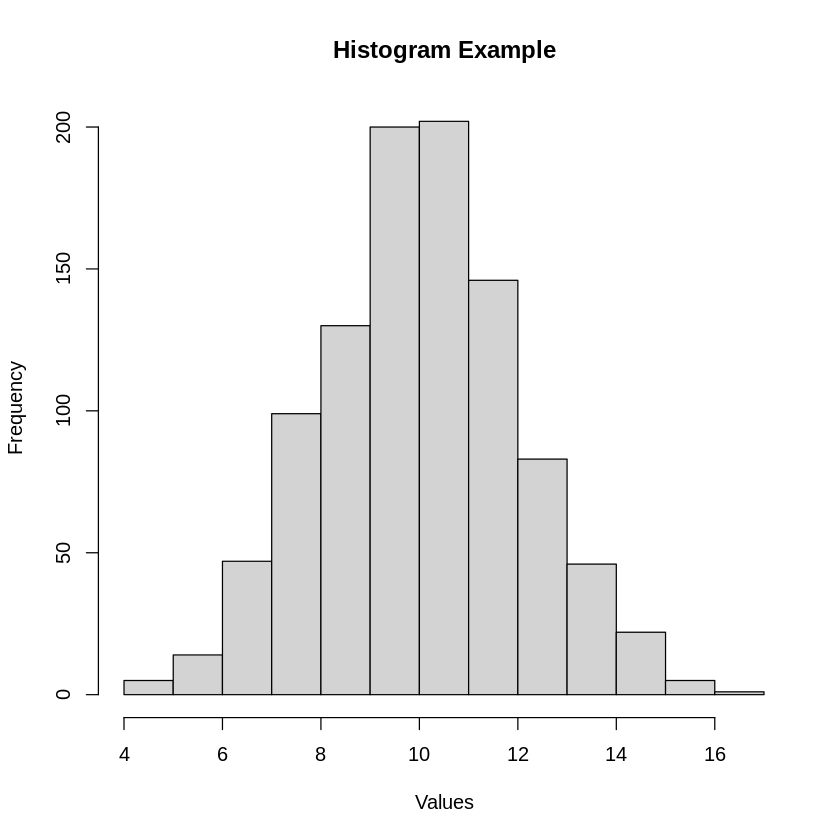

In [2]:
# Generating sample continuous data
set.seed(123)
x <- rnorm(1000, mean = 10, sd = 2)  # Normally distributed random data

# Creating a histogram
hist(x, breaks = "Sturges", xlab = "Values", ylab = "Frequency", main = "Histogram Example")


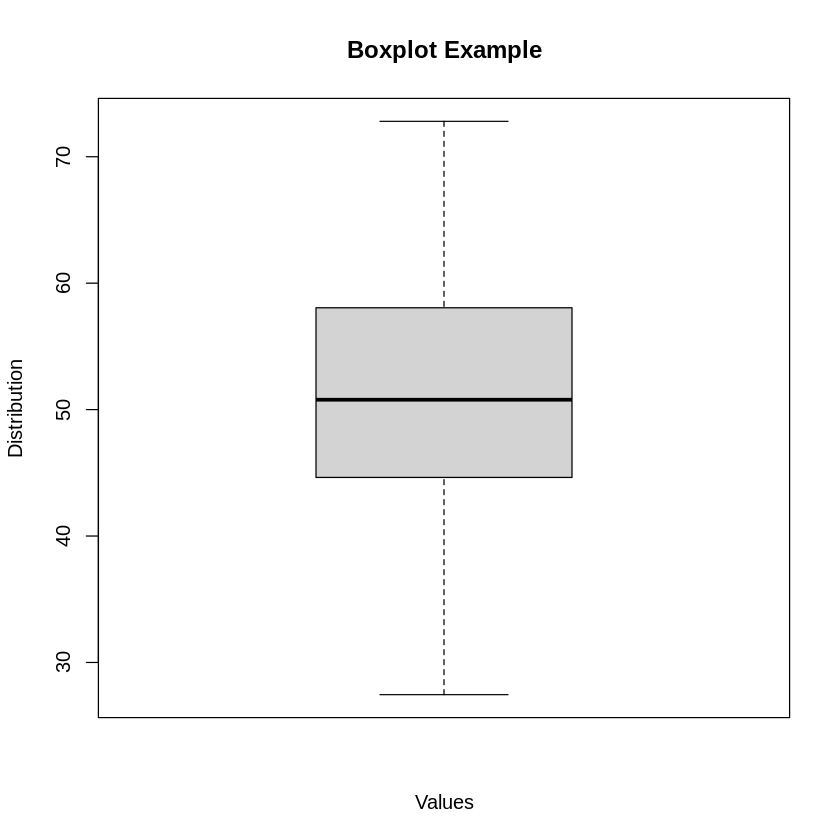

In [3]:
# Generating sample continuous data
set.seed(456)
x <- rnorm(100, mean = 50, sd = 10)  # Normally distributed random data

# Creating a boxplot
boxplot(x, horizontal = FALSE, xlab = "Values", ylab = "Distribution", main = "Boxplot Example")


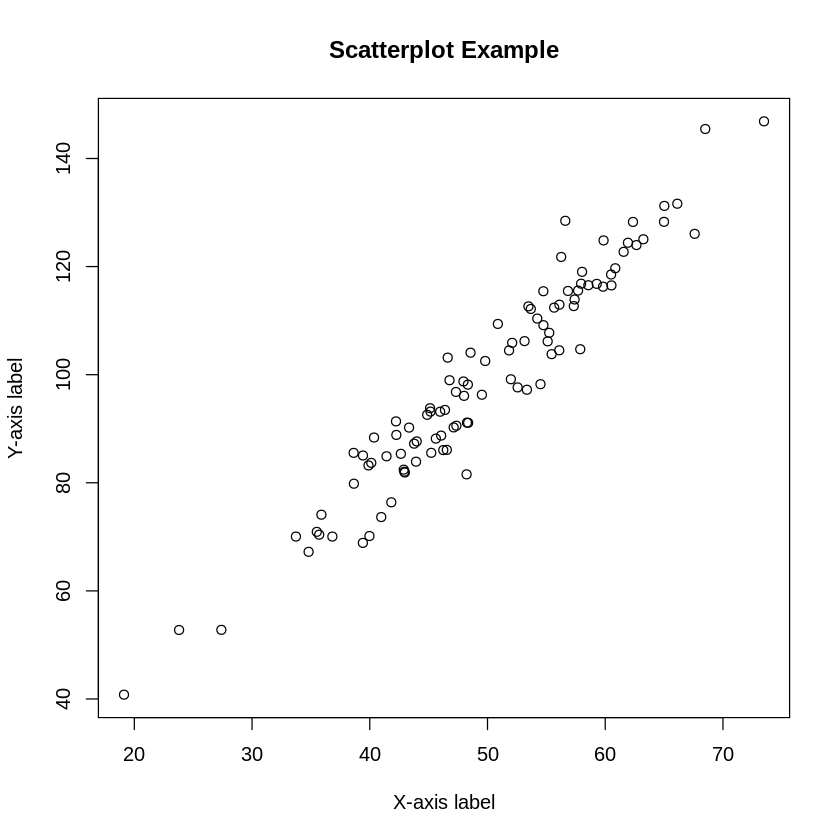

In [4]:
# Generating sample data
set.seed(789)
x <- rnorm(100, mean = 50, sd = 10)  # Random data for x-axis
y <- 2 * x + rnorm(100, mean = 0, sd = 5)  # Random data for y-axis with linear relationship to x

# Creating a scatterplot
plot(x, y, xlab = "X-axis label", ylab = "Y-axis label", main = "Scatterplot Example")


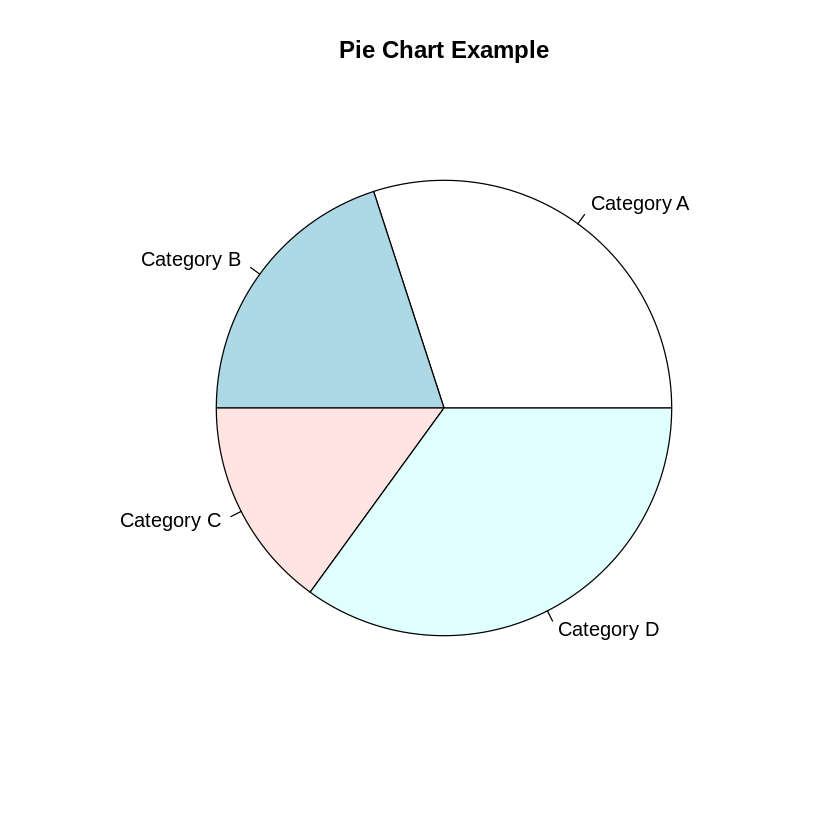

In [5]:
# Sample data
x <- c(30, 20, 15, 35)  # Frequency of each category
categories <- c("Category A", "Category B", "Category C", "Category D")  # Labels for categories

# Creating a pie chart
pie(x, labels = categories, main = "Pie Chart Example")



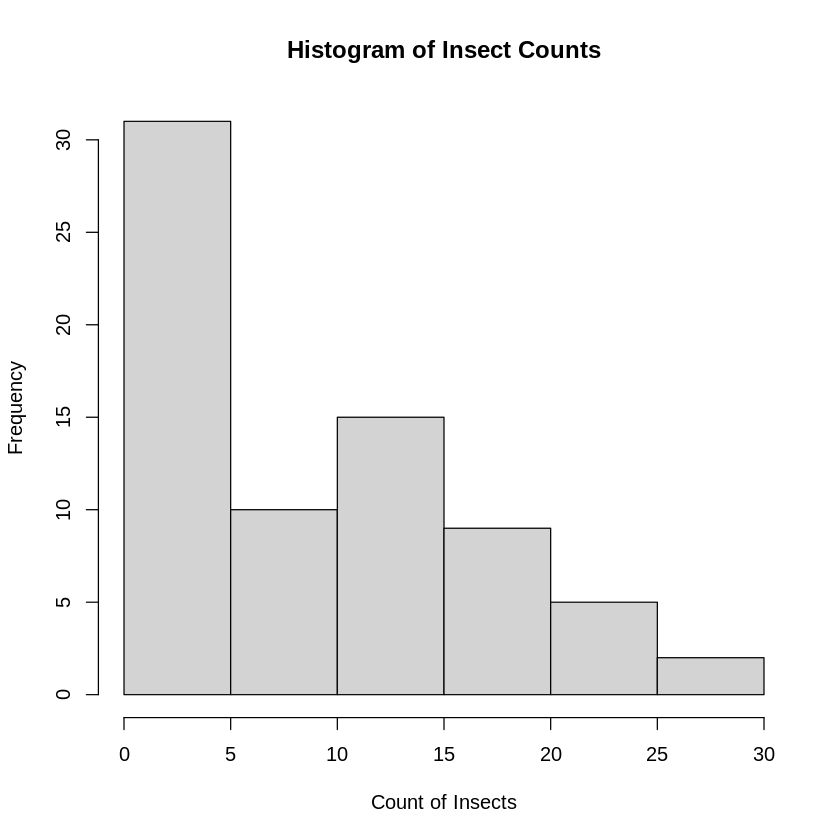

In [6]:
hist(InsectSprays$count, main = "Histogram of Insect Counts", xlab = "Count of Insects", ylab = "Frequency")


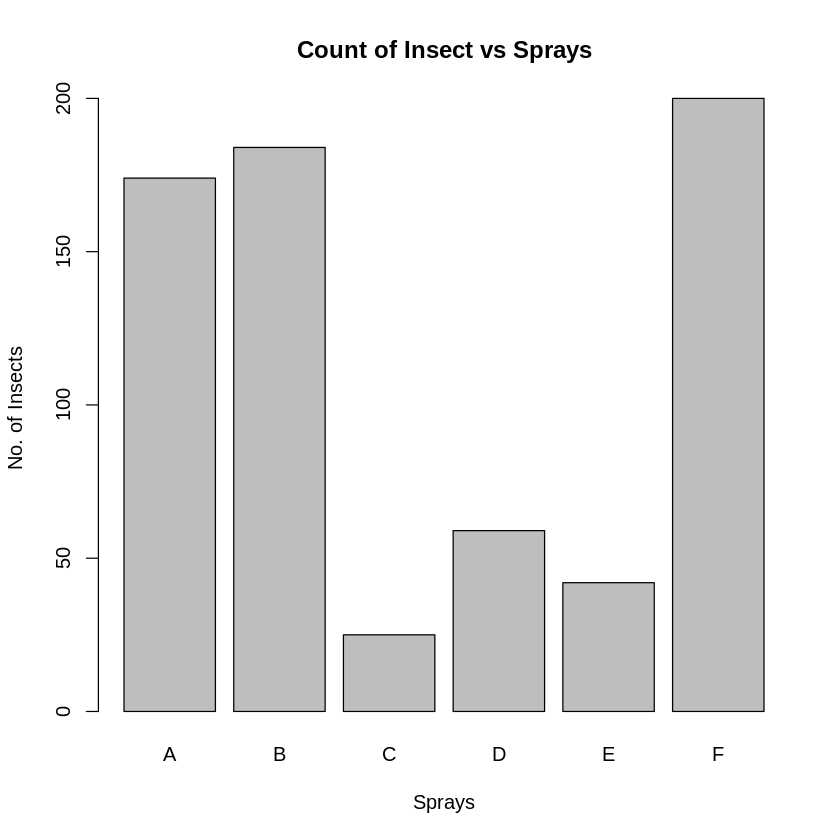

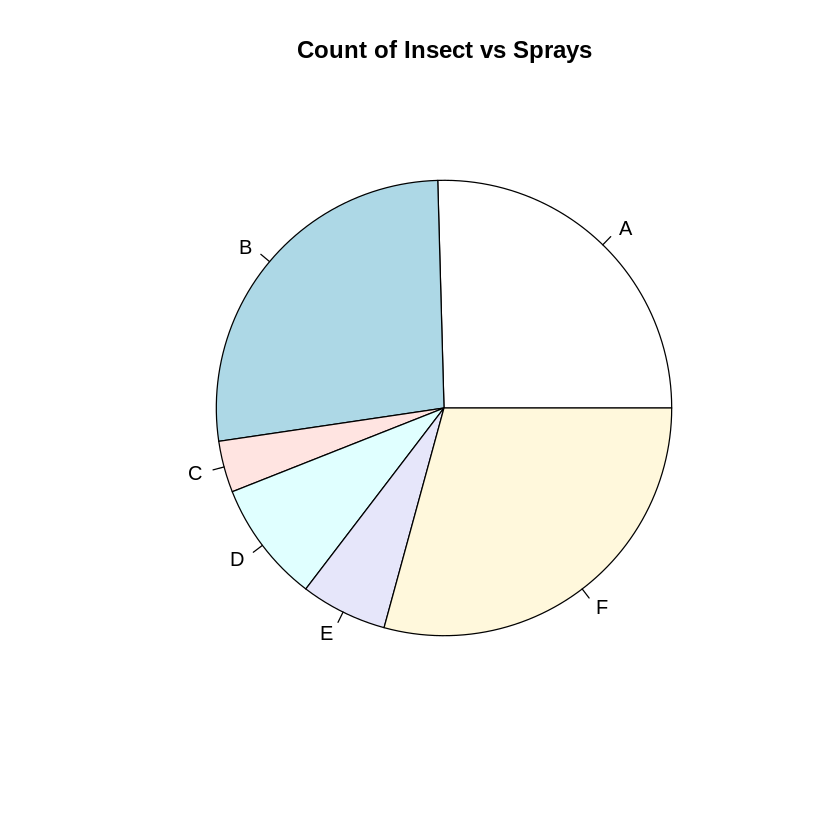

In [7]:
# Calculate total count of insects for each spray type using tapply
t <- tapply(InsectSprays$count, InsectSprays$spray, sum)

# Display counts as a barplot
barplot(t, xlab = "Sprays", ylab = "No. of Insects", main = "Count of Insect vs Sprays", space = NULL)

# Display counts as a pie chart
pie(t, main = "Count of Insect vs Sprays")


In [9]:
library(ggplot2)

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


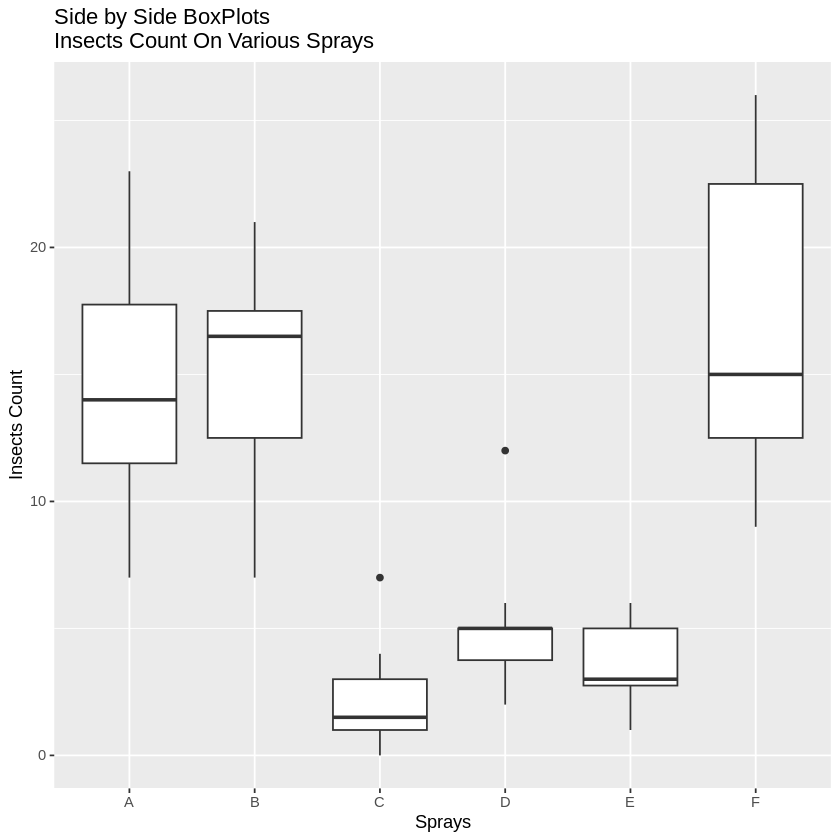

In [10]:
qplot(InsectSprays$spray, InsectSprays$count, geom = "boxplot", xlab = "Sprays", ylab = "Insects Count", main = "Side by Side BoxPlots\nInsects Count On Various Sprays")


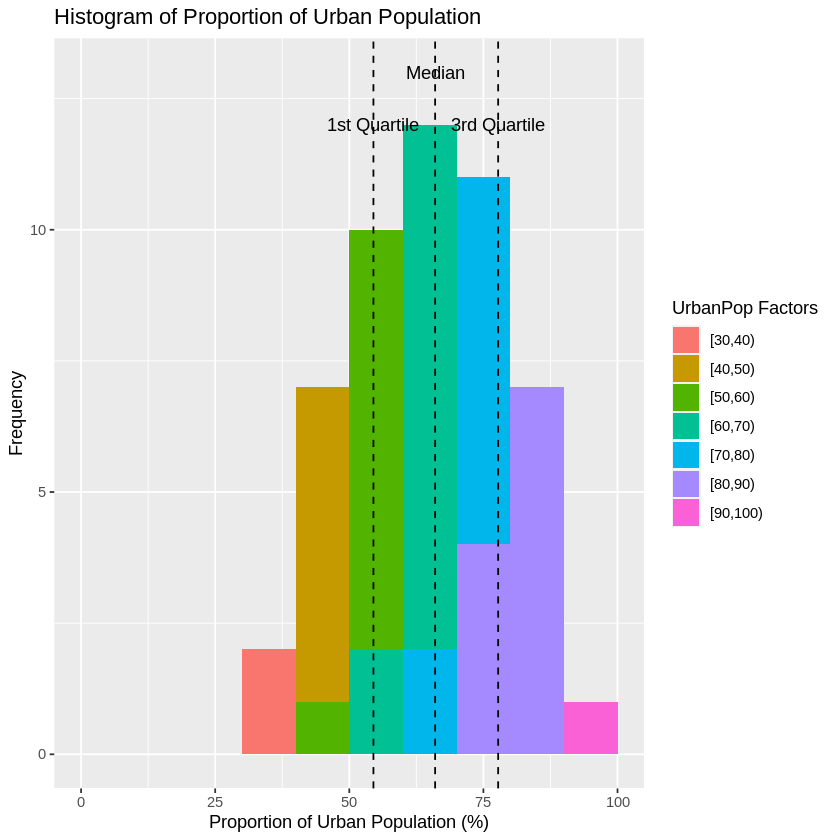

In [11]:
# Calculate quartiles of UrbanPop
xint <- quantile(USArrests$UrbanPop, c(0.25, 0.5, 0.75))

# Create histogram using ggplot
ggplot(USArrests, aes(UrbanPop)) +
  geom_histogram(breaks = seq(0, 100, by = 10), aes(fill = factor(cut(UrbanPop, breaks = seq(0, 100, by = 10), right = FALSE))), show.legend = TRUE) +
  geom_vline(xintercept = xint, linetype = "dashed") +
  annotate("text", y = 12, x = xint[1], label = "1st Quartile") +
  annotate("text", y = 13, x = xint[2], label = "Median") +
  annotate("text", y = 12, x = xint[3], label = "3rd Quartile") +
  labs(x = "Proportion of Urban Population (%)", y = "Frequency", title = "Histogram of Proportion of Urban Population") +
  scale_fill_discrete(name = "UrbanPop Factors")


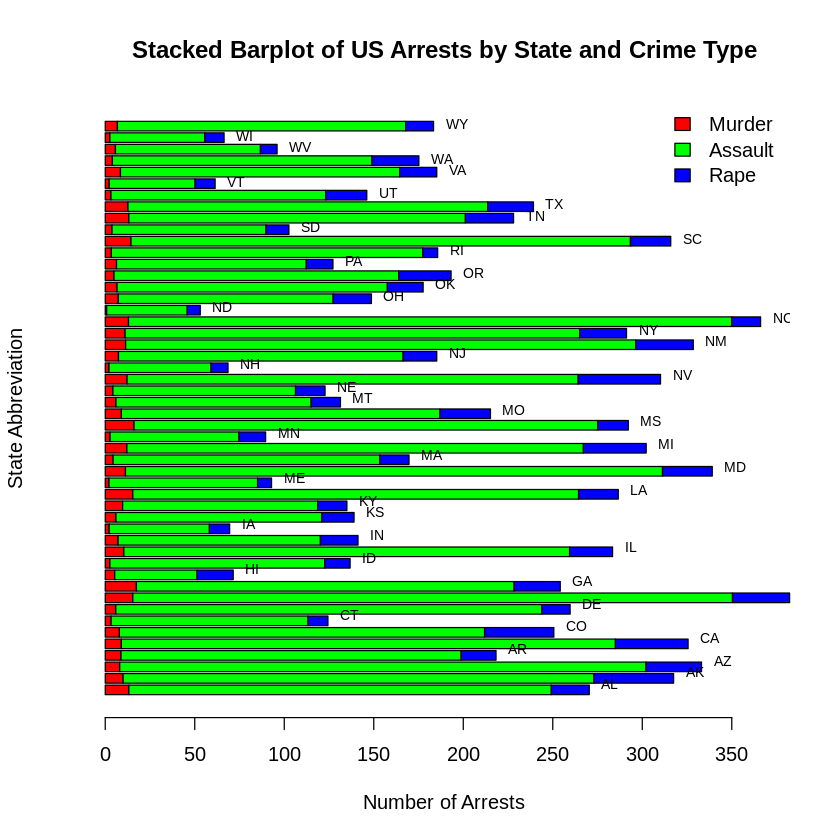

In [12]:
# Transpose the USArrests dataset
arrests <- t(as.matrix(USArrests[, -3]))

# Create a stacked barplot
barplot(arrests, horiz = TRUE, col = c("red", "green", "blue"),
        legend.text = TRUE, axisnames = FALSE,
        args.legend = list(x = "topright", bty = "n"),
        main = "Stacked Barplot of US Arrests by State and Crime Type",
        xlab = "Number of Arrests", ylab = "State Abbreviation")

# Add state abbreviations as text labels
text(x = colSums(arrests), y = 1:length(state.abb) * 1.19, labels = state.abb, pos = 4, cex = 0.7)


In [13]:
# Calculate the median of UrbanPop
median <- median(USArrests$UrbanPop)

# Create urbancat variable
urbancat <- ifelse(USArrests$UrbanPop > median, 1, 0)

# Convert urbancat to a factor with labels "0" and "1"
urbancat <- factor(urbancat, levels = c(0, 1), labels = c("0", "1"))

# Print urbancat
urbancat


[1] 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1
[39] 1 0 0 0 1 1 0 0 1 0 0 0
Levels: 0 1

In [14]:
# Remove the third column (state names) from USArrests
new_USArrests <- USArrests[, -3]

# Add urbancat as a new column to new_USArrests
new_USArrests <- cbind(new_USArrests, urbancat)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘Rcpp’, ‘ggstats’, ‘plyr’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



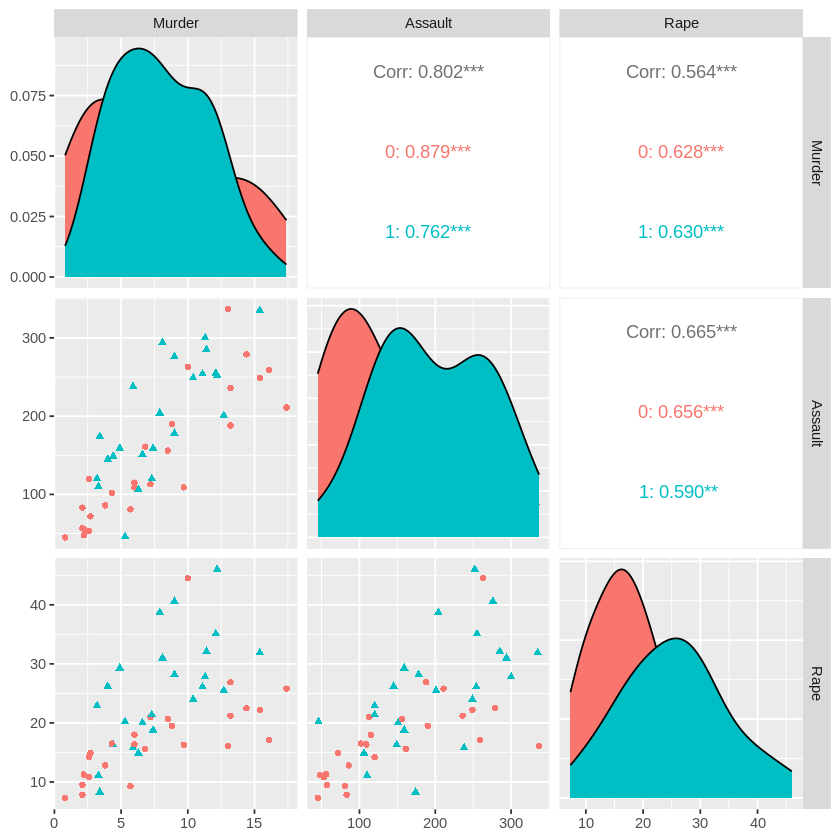

In [16]:
install.packages("GGally")

# Load the GGally package
library(GGally)

# Create a matrix of scatterplots
ggpairs(new_USArrests, columns = c("Murder", "Assault", "Rape"),
        mapping = aes(col = urbancat, shape = urbancat))


In [17]:
# Calculate quantiles of magnitude
qmag <- quantile(quakes$mag, c(0, 1/3, 2/3, 1))

# Create factor variable magfac
magfac <- factor(cut(quakes$mag, breaks = qmag, labels = c(0, 1, 2),
                     levels = c("Low", "Medium", "High"), include.lowest = TRUE))

# Print the first few elements of magfac
head(magfac)


[1] 2 0 2 0 0 0
Levels: 0 1 2

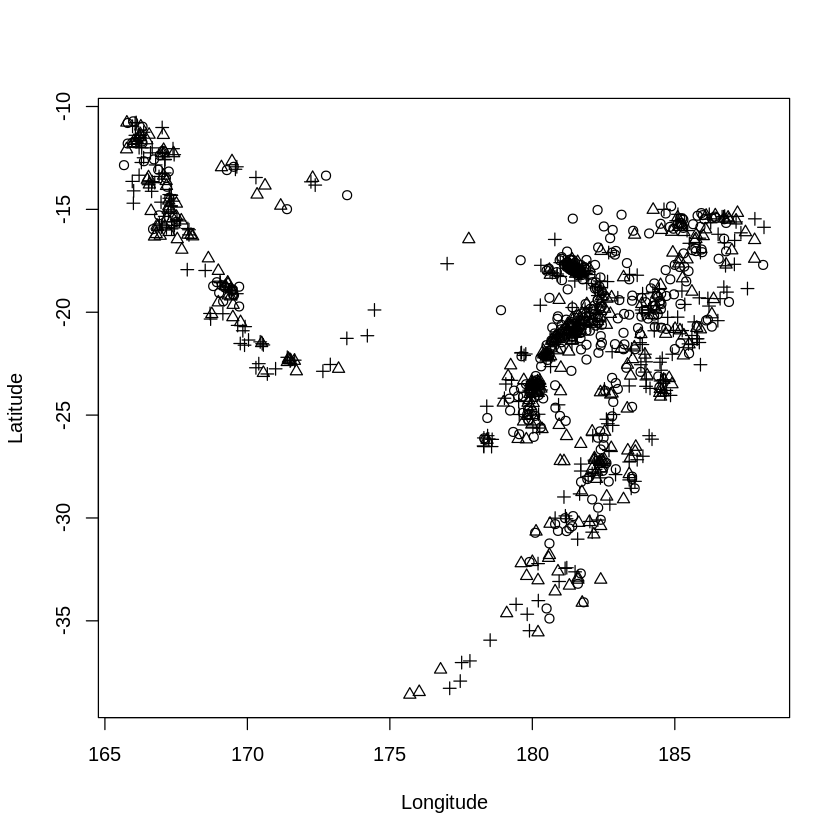

In [22]:
# Combine the magfac variable with the quakes dataset
quakes <- cbind(quakes, magfac)

# Create an empty plot with specified x and y labels
plot(quakes[, 2], quakes[, 1], type = "n", xlab = "Longitude", ylab = "Latitude")

# Plot points for each level of magnitude
points(quakes[quakes$magfac == 0, 2], quakes[quakes$magfac == 0, 1], pch = 1)
points(quakes[quakes$magfac == 1, 2], quakes[quakes$magfac == 1, 1], pch = 2)
points(quakes[quakes$magfac == 2, 2], quakes[quakes$magfac == 2, 1], pch = 3)


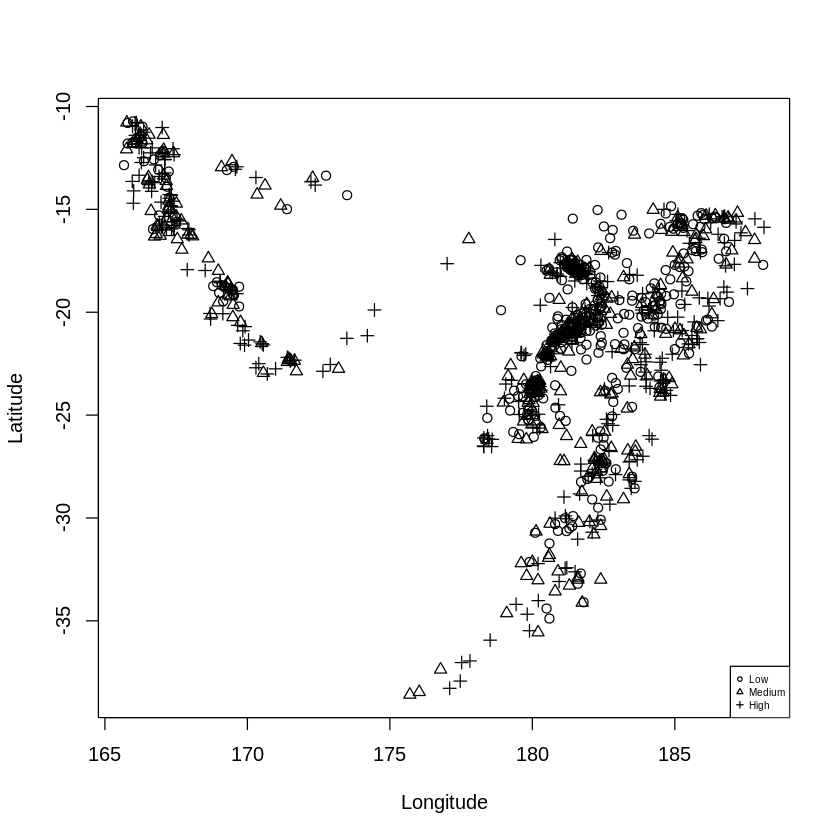

In [23]:
# Combine the magfac variable with the quakes dataset
quakes <- cbind(quakes, magfac)

# Create an empty plot with specified x and y labels
plot(quakes[, 2], quakes[, 1], type = "n", xlab = "Longitude", ylab = "Latitude")

# Plot points for each level of magnitude
points(quakes[quakes$magfac == 0, 2], quakes[quakes$magfac == 0, 1], pch = 1)
points(quakes[quakes$magfac == 1, 2], quakes[quakes$magfac == 1, 1], pch = 2)
points(quakes[quakes$magfac == 2, 2], quakes[quakes$magfac == 2, 1], pch = 3)

# Add legend
legend("bottomright", legend = c("Low", "Medium", "High"), pch = c(1:3), cex = 0.5)
